In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np
from surprise import KNNBasic
from surprise import KNNWithZScore
from surprise.model_selection import cross_validate
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


In [2]:
# Load the data from the uploaded file
# Make sure to upload 'ratings_small.csv' using the Kaggle interface
file_path = '/kaggle/input/the-movies-dataset/ratings_small.csv'
file_data = pd.read_csv('/kaggle/input/the-movies-dataset/ratings_small.csv')
file_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
# Load the data from the uploaded file
# Make sure to upload 'ratings_small.csv' using the Kaggle interface
file_path = '/kaggle/input/the-movies-dataset/ratings_small.csv'
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(1, 5), skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)


# Define the algorithms
pmf = SVD(biased=False)  # Probabilistic Matrix Factorization
user_cf = KNNBasic(sim_options={'user_based': True})  # User-based Collaborative Filtering
item_cf = KNNBasic(sim_options={'user_based': False})  # Item-based Collaborative Filtering

# Define a function to perform cross-validation and compute MAE, RMSE
def evaluate(algo, data):
    cross_validate_output = cross_validate(algo, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
    avg_mae = cross_validate_output['test_mae'].mean()
    avg_rmse = cross_validate_output['test_rmse'].mean()
    return avg_mae, avg_rmse

# Evaluate the algorithms
pmf_mae, pmf_rmse = evaluate(pmf, data)
user_cf_mae, user_cf_rmse = evaluate(user_cf, data)
item_cf_mae, item_cf_rmse = evaluate(item_cf, data)

# Print the results
print(f'Probabilistic Matrix Factorization - MAE: {pmf_mae}, RMSE: {pmf_rmse}')
print(f'User-based Collaborative Filtering - MAE: {user_cf_mae}, RMSE: {user_cf_rmse}')
print(f'Item-based Collaborative Filtering - MAE: {item_cf_mae}, RMSE: {item_cf_rmse}')



Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7841  0.7809  0.7790  0.7748  0.7782  0.7794  0.0031  
RMSE (testset)    1.0142  1.0128  1.0086  1.0057  1.0082  1.0099  0.0031  
Fit time          1.17    1.20    1.21    1.22    1.20    1.20    0.01    
Test time         0.20    0.11    0.19    0.10    0.18    0.16    0.04    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7390  0.7477  0.7451  0.7389  0.7450  0.7431  0.0035

In [4]:
# Print the mean results for each algorithm
print(f'User-based Collaborative Filtering - Mean MAE: {user_cf_mae}, Mean RMSE: {user_cf_rmse}')
print(f'Item-based Collaborative Filtering - Mean MAE: {item_cf_mae}, Mean RMSE: {item_cf_rmse}')
print(f'Probabilistic Matrix Factorization - Mean MAE: {pmf_mae}, Mean RMSE: {pmf_rmse}')

# Compare the models based on RMSE and MAE
min_mae = min(user_cf_mae, item_cf_mae, pmf_mae)
min_rmse = min(user_cf_rmse, item_cf_rmse, pmf_rmse)

print("\nComparison:")
if user_cf_mae == min_mae:
    print("User-based Collaborative Filtering has the minimum MAE.")
if item_cf_mae == min_mae:
    print("Item-based Collaborative Filtering has the minimum MAE.")
if pmf_mae == min_mae:
    print("Probabilistic Matrix Factorization has the minimum MAE.")

if user_cf_rmse == min_rmse:
    print("User-based Collaborative Filtering has the minimum RMSE.")
if item_cf_rmse == min_rmse:
    print("Item-based Collaborative Filtering has the minimum RMSE.")
if pmf_rmse == min_rmse:
    print("Probabilistic Matrix Factorization has the minimum RMSE.")

User-based Collaborative Filtering - Mean MAE: 0.7431478946167224, Mean RMSE: 0.9664231152153402
Item-based Collaborative Filtering - Mean MAE: 0.7218285936023928, Mean RMSE: 0.9351540723009599
Probabilistic Matrix Factorization - Mean MAE: 0.7793911310670067, Mean RMSE: 1.0098969153047996

Comparison:
Item-based Collaborative Filtering has the minimum MAE.
Item-based Collaborative Filtering has the minimum RMSE.


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7735  0.7664  0.7673  0.7667  0.7672  0.7682  0.0026  
RMSE (testset)    0.9959  0.9916  0.9947  0.9950  0.9925  0.9939  0.0016  
Fit time          0.16    0.17    0.17    0.17    0.16    0.17    0.00    
Test time         1.22    1.34    1.24    1.27    1.24    1.26    0.04    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

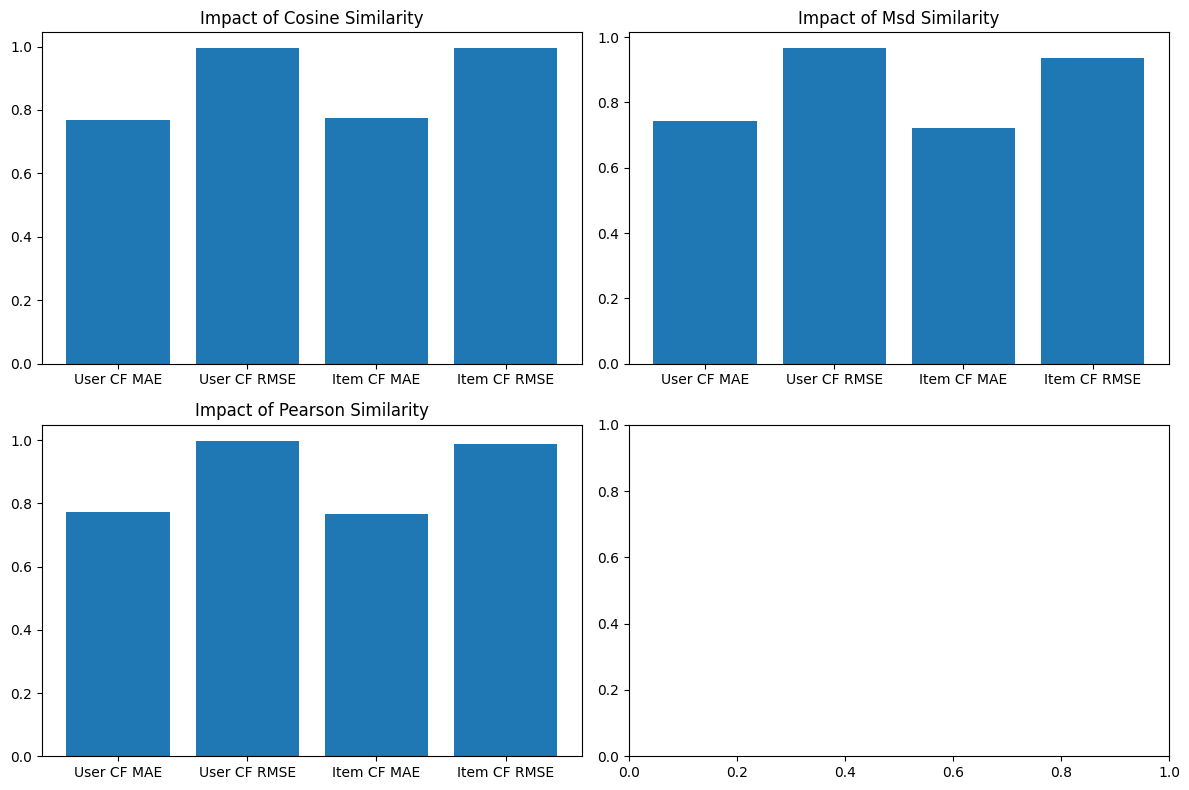

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from surprise import KNNBasic
from surprise.model_selection import cross_validate

# Define similarity metrics
similarity_metrics = ['cosine', 'msd', 'pearson']

# Create empty dictionaries to store results
user_cf_results = {'cosine': [], 'msd': [], 'pearson': []}
item_cf_results = {'cosine': [], 'msd': [], 'pearson': []}

# Iterate over similarity metrics
for metric in similarity_metrics:
    # User-based Collaborative Filtering
    user_cf = KNNBasic(sim_options={'user_based': True, 'name': metric})
    user_cf_mae, user_cf_rmse = evaluate(user_cf, data)
    user_cf_results[metric] = (user_cf_mae, user_cf_rmse)

    # Item-based Collaborative Filtering
    item_cf = KNNBasic(sim_options={'user_based': False, 'name': metric})
    item_cf_mae, item_cf_rmse = evaluate(item_cf, data)
    item_cf_results[metric] = (item_cf_mae, item_cf_rmse)

# Plot the results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, metric in enumerate(similarity_metrics):
    axes[i].bar(['User CF MAE', 'User CF RMSE', 'Item CF MAE', 'Item CF RMSE'],
                [user_cf_results[metric][0], user_cf_results[metric][1],
                 item_cf_results[metric][0], item_cf_results[metric][1]])
    axes[i].set_title(f'Impact of {metric.capitalize()} Similarity')

plt.tight_layout()
plt.show()


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7587  0.7591  0.7476  0.7525  0.7526  0.7541  0.0043  
RMSE (testset)    0.9937  0.9912  0.9767  0.9799  0.9837  0.9850  0.0065  
Fit time          0.11    0.15    0.13    0.14    0.13    0.13    0.01    
Test time         0.87    1.03    0.89    0.89    0.93    0.92    0.06    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

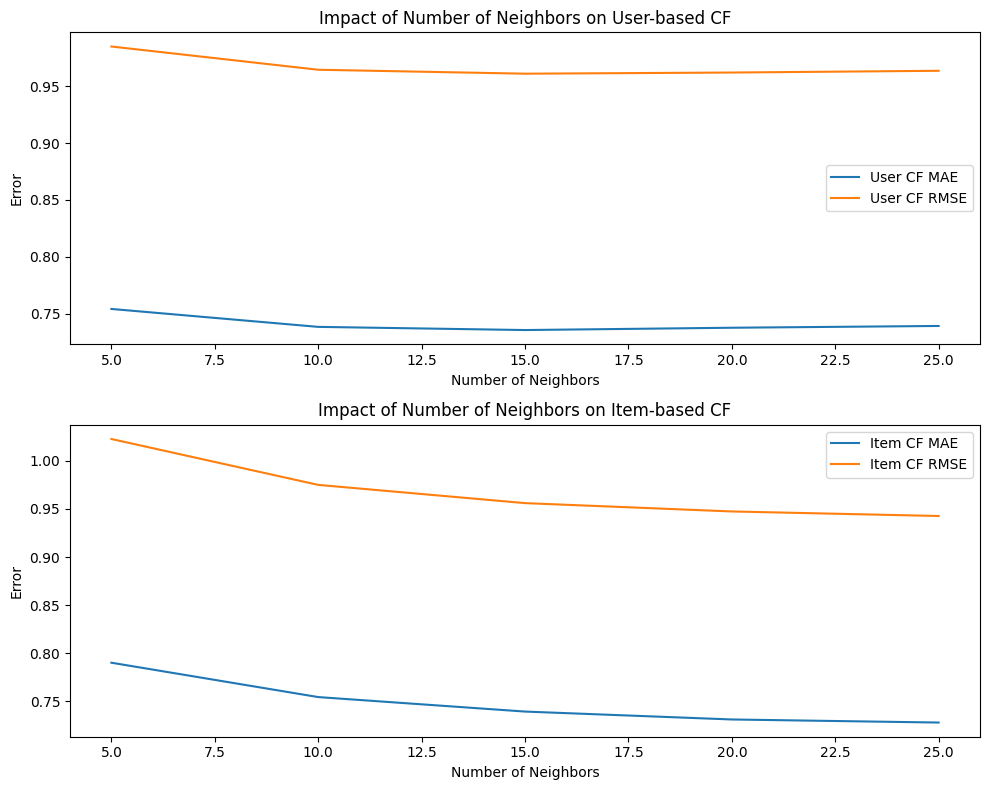

In [8]:
# Define a range of neighbors
num_neighbors_list = [5, 10, 15, 20, 25]

# Create empty lists to store results
user_cf_results = {'mae': [], 'rmse': []}
item_cf_results = {'mae': [], 'rmse': []}

# Iterate over the number of neighbors
for num_neighbors in num_neighbors_list:
    # User-based Collaborative Filtering
    user_cf = KNNBasic(k=num_neighbors, sim_options={'user_based': True})
    user_cf_mae, user_cf_rmse = evaluate(user_cf, data)
    user_cf_results['mae'].append(user_cf_mae)
    user_cf_results['rmse'].append(user_cf_rmse)

    # Item-based Collaborative Filtering
    item_cf = KNNBasic(k=num_neighbors, sim_options={'user_based': False})
    item_cf_mae, item_cf_rmse = evaluate(item_cf, data)
    item_cf_results['mae'].append(item_cf_mae)
    item_cf_results['rmse'].append(item_cf_rmse)

# Plot the results
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# User-based Collaborative Filtering
axes[0].plot(num_neighbors_list, user_cf_results['mae'], label='User CF MAE')
axes[0].plot(num_neighbors_list, user_cf_results['rmse'], label='User CF RMSE')
axes[0].set_title('Impact of Number of Neighbors on User-based CF')
axes[0].set_xlabel('Number of Neighbors')
axes[0].set_ylabel('Error')
axes[0].legend()

# Item-based Collaborative Filtering
axes[1].plot(num_neighbors_list, item_cf_results['mae'], label='Item CF MAE')
axes[1].plot(num_neighbors_list, item_cf_results['rmse'], label='Item CF RMSE')
axes[1].set_title('Impact of Number of Neighbors on Item-based CF')
axes[1].set_xlabel('Number of Neighbors')
axes[1].set_ylabel('Error')
axes[1].legend()

plt.tight_layout()
plt.show()


In [9]:
# Define a range of neighbors
param_grid = {'k': [5, 10, 15, 20, 25]}

# User-based Collaborative Filtering
user_cf_results = {'rmse': []}
for k in param_grid['k']:
    user_cf = KNNWithZScore(k=k, sim_options={'user_based': True})
    user_cf_mae, user_cf_rmse = evaluate(user_cf, data)
    user_cf_results['rmse'].append(user_cf_rmse)

# Item-based Collaborative Filtering
item_cf_results = {'rmse': []}
for k in param_grid['k']:
    item_cf = KNNWithZScore(k=k, sim_options={'user_based': False})
    item_cf_mae, item_cf_rmse = evaluate(item_cf, data)
    item_cf_results['rmse'].append(item_cf_rmse)

# Get the best K for User-based Collaborative Filtering
best_k_user_cf = param_grid['k'][np.argmin(user_cf_results['rmse'])]

# Get the best K for Item-based Collaborative Filtering
best_k_item_cf = param_grid['k'][np.argmin(item_cf_results['rmse'])]

print(f'Best K for User-based Collaborative Filtering: {best_k_user_cf}')
print(f'Best K for Item-based Collaborative Filtering: {best_k_item_cf}')

# Check if the best K values are the same
if best_k_user_cf == best_k_item_cf:
    print("The best K for User-based and Item-based Collaborative Filtering is the same.")
else:
    print("The best K for User-based and Item-based Collaborative Filtering is different.")


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNWithZScore on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7347  0.7376  0.7356  0.7392  0.7418  0.7378  0.0026  
RMSE (testset)    0.9623  0.9623  0.9580  0.9675  0.9697  0.9640  0.0042  
Fit time          0.19    0.21    0.21    0.21    0.21    0.21    0.01    
Test time         0.93    1.04    0.90    0.92    0.90    0.94    0.05    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done comput